In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [49]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [50]:
from sklearn.model_selection import train_test_split
#Splits the dataset into training and testing sets for model evaluation.

from sklearn.preprocessing import StandardScaler
#Standardizes the data by scaling features to have zero mean and unit variance, improving model performance.

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
#Imports the Support Vector Classifier (SVC), useful for complex decision boundaries.

from xgboost import XGBClassifier
#Imports the XGBoost classifier, a powerful gradient boosting algorithm for efficient predictions.

from sklearn import metrics
#Provides evaluation metrics like accuracy, precision, recall, etc., to assess model performance.

import warnings
warnings.filterwarnings('ignore')

#### Importing Dataset

In [51]:
df = pd.read_csv(r'C:\Users\hp\Desktop\ML_Project\Bit_Coin_Prediction\BTC-USD(1).csv')

In [52]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [53]:
df.shape

(2747, 7)

In [54]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2.747000e+03
mean,11668.600272,11981.034949,11325.596907,11682.892098,11682.892098,1.484704e+10
std,16323.683853,16759.568657,15825.584507,16330.191582,16330.191582,1.994819e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,609.122009,611.894501,606.309479,609.234009,609.234009,8.161285e+07
50%,6371.850098,6500.870117,6285.629883,6376.709961,6376.709961,5.227550e+09
75%,10728.271485,10992.468751,10412.890137,10755.395019,10755.395019,2.500517e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2747 non-null   object 
 1   Open       2747 non-null   float64
 2   High       2747 non-null   float64
 3   Low        2747 non-null   float64
 4   Close      2747 non-null   float64
 5   Adj Close  2747 non-null   float64
 6   Volume     2747 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 150.4+ KB


In [56]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

#### Plotting Figure

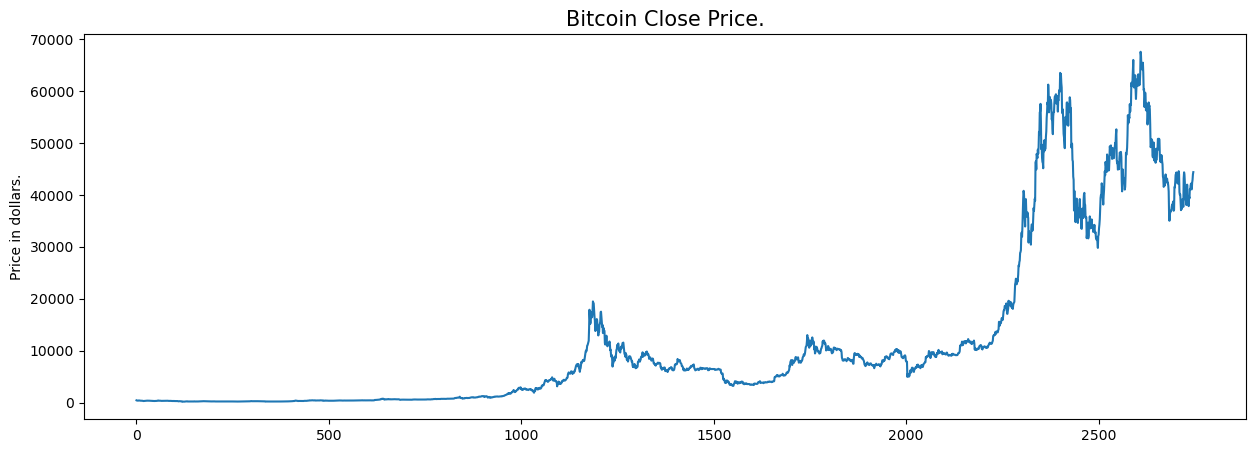

In [57]:
plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.title('Bitcoin Close Price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

### Why Check for Equality?
In stock market data, the Close price is the price at which the asset last traded during a particular trading session.

The Adj Close (Adjusted Close) is the closing price adjusted for corporate actions like dividends, splits, etc.

If Close and Adj Close are identical throughout the dataset, it suggests:

No adjustments (like splits or dividends) occurred in the recorded period.

The dataset may not need separate handling of Adj Close.

In [58]:
df[df['Close'] == df['Adj Close']].shape

(2747, 7)

In [59]:
df.shape

(2747, 7)

From here we can conclude that all the rows of columns ‘Close’ and ‘Adj Close’ have the same data. So, having redundant data in the dataset is not going to help so, we’ll drop this column before further analysis.

In [60]:
df = df.drop(['Adj Close'], axis=1)

Now let’s draw the distribution plot for the continuous features given in the dataset.

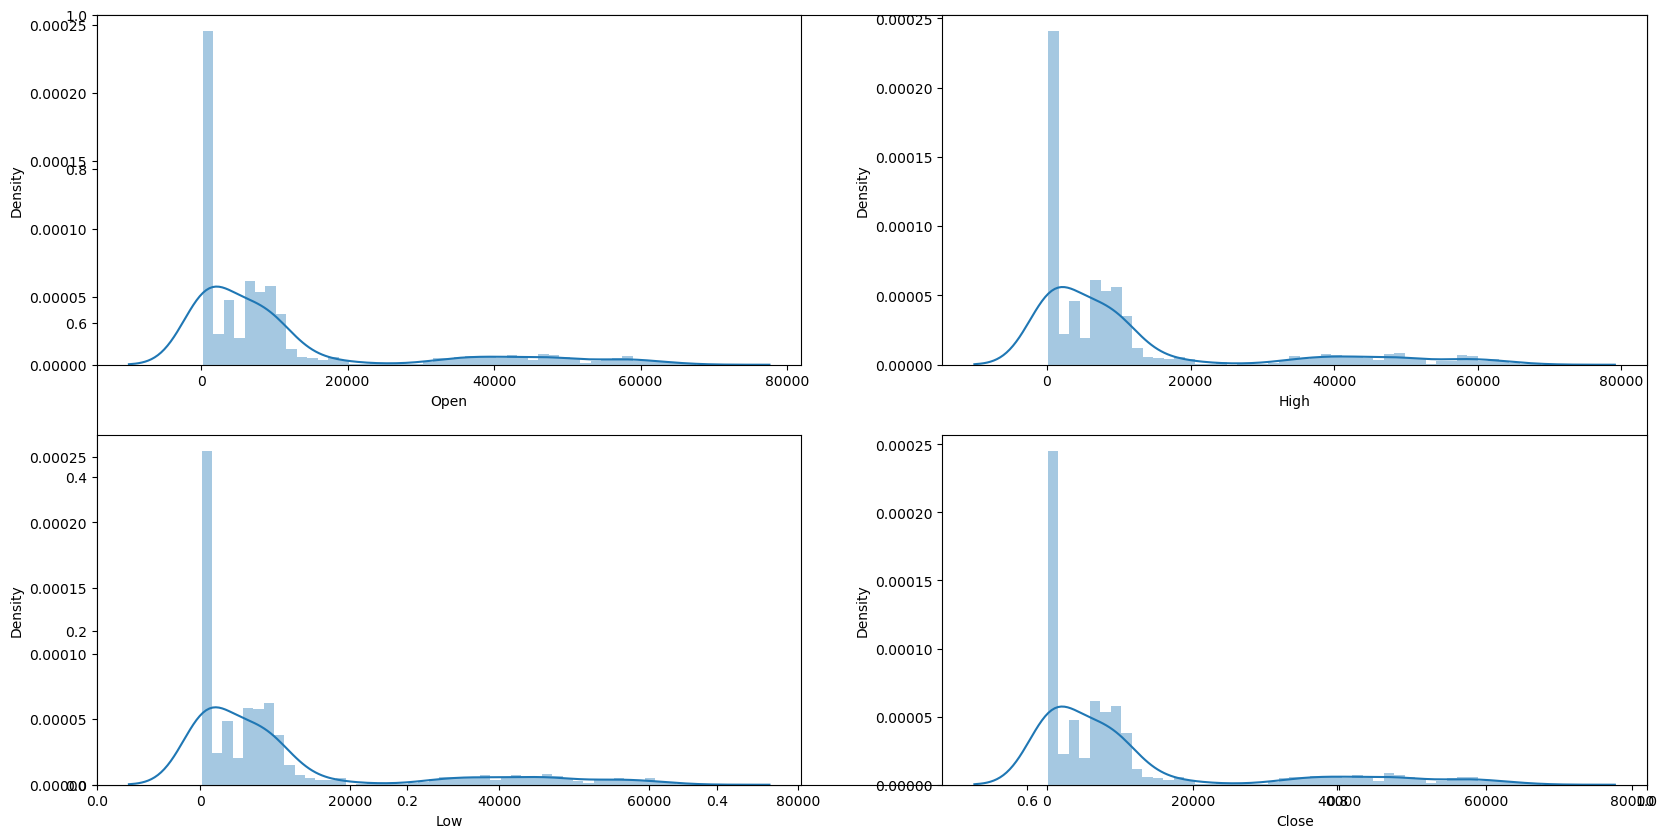

In [61]:
features = ['Open', 'High', 'Low', 'Close']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i+1)
    sb.distplot(df[col])
plt.show()

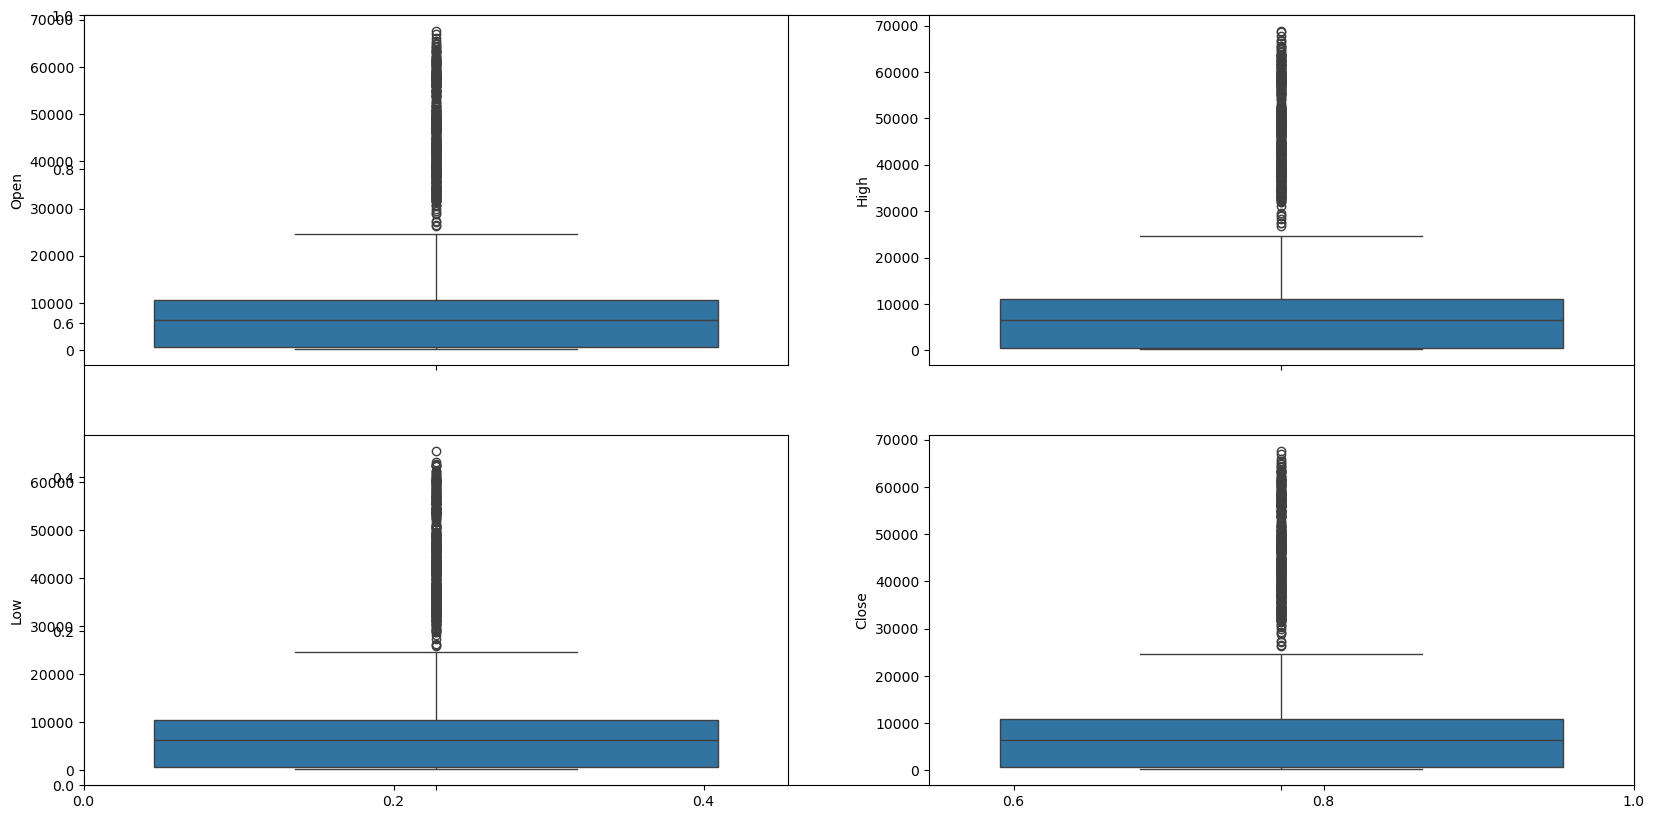

In [62]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i+1)
    sb.boxplot(df[col])
plt.show()

There are so many outliers in the data which means that the prices of the stock have varied hugely in a very short period of time. Let’s check this with the help of a barplot.

#### Feature Engineering

In [63]:
splitted = df['Date'].str.split('-', expand=True)

df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')

#Convert the 'Date' column to determine objects
df['Date'] = pd.to_datetime(df['Date'])

In [64]:
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21


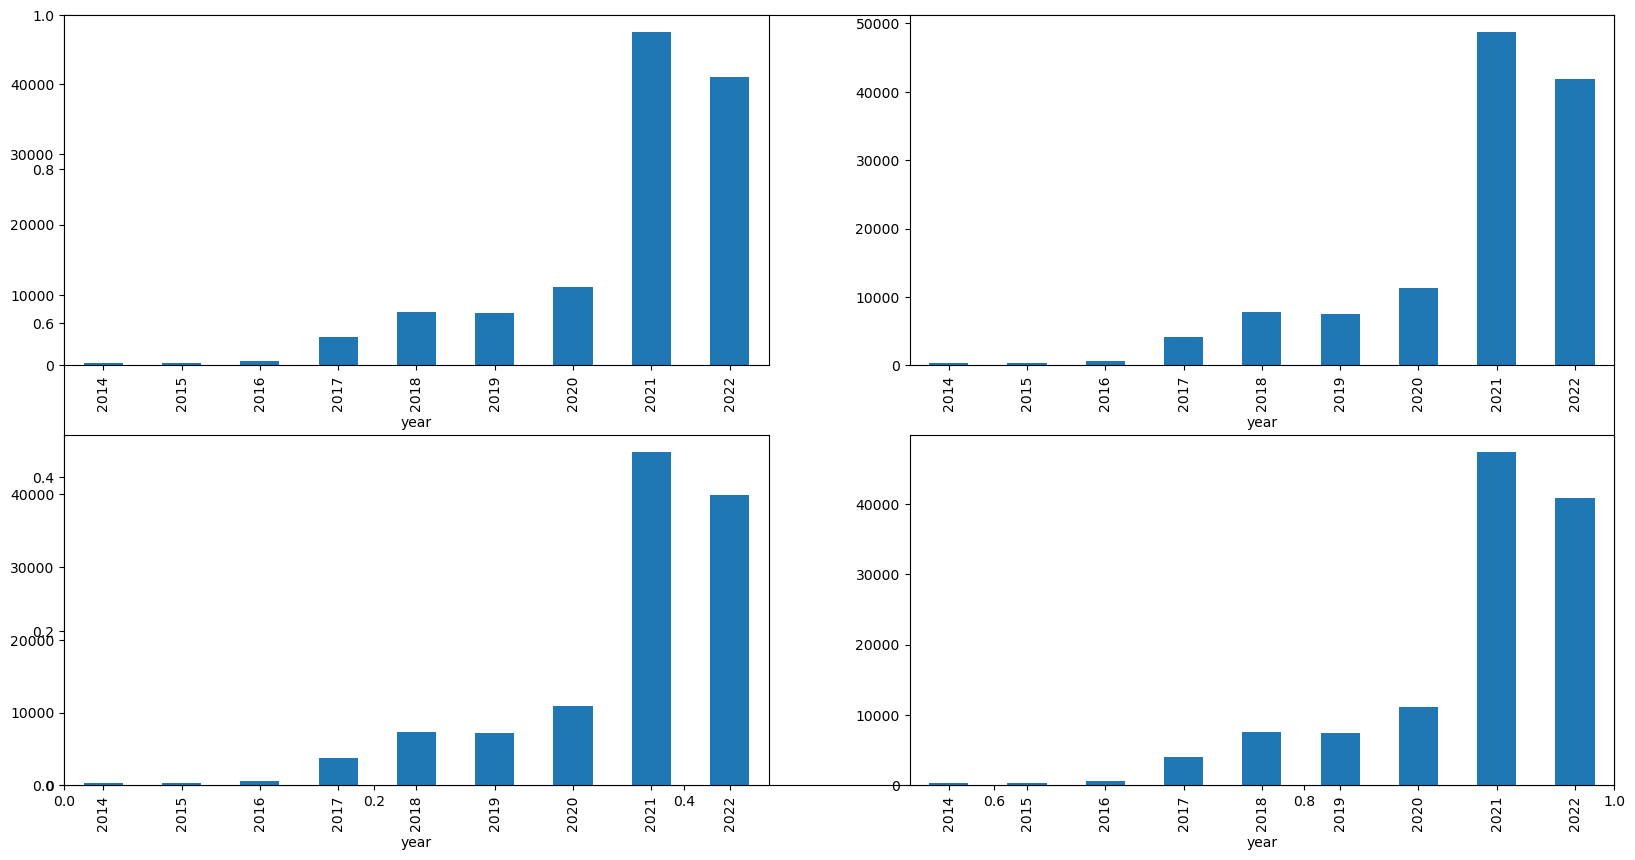

In [65]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20, 10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i+1)
    data_grouped[col].plot.bar()
plt.show()

In [66]:
df['is_quarter_end'] = np.where(df['month']%3 == 0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17,1
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18,1
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20,1
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21,1


In [67]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'],1,0)

In [68]:
# df['open-close'] = df['Open'] - df['Close']
# ✅ Purpose: Captures the price movement within a day.

# If open-close > 0 → The stock closed lower than it opened (🔻 bearish signal).

# If open-close < 0 → The stock closed higher than it opened (🔺 bullish signal).

# Useful for identifying intraday trends.

# 2. df['low-high'] = df['Low'] - df['High']
# ✅ Purpose: Measures the price range for the day (volatility indicator).

# Since Low is always less than High, this value is always negative or zero.

# The larger the absolute value, the more volatile the market was on that day.

# 3. df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
# ✅ Purpose: Creates a target variable for your prediction model.

# .shift(-1) moves the closing price one step forward (i.e., the next day's closing price).

# If the next day's closing price is higher than today's ➔ 1 (indicating an upward trend).

# If the next day's closing price is lower or equal ➔ 0 (indicating a downward trend).

Above we have added some more columns which will help in the training of our model. We have added the target feature which is a signal whether to buy or not we will train our model to predict this only. But before proceeding let’s check whether the target is balanced or not using a pie chart.

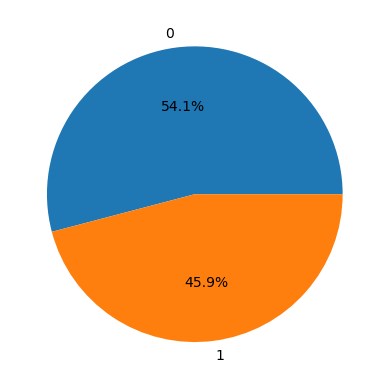

In [69]:
plt.pie(df['target'].value_counts().values, 
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

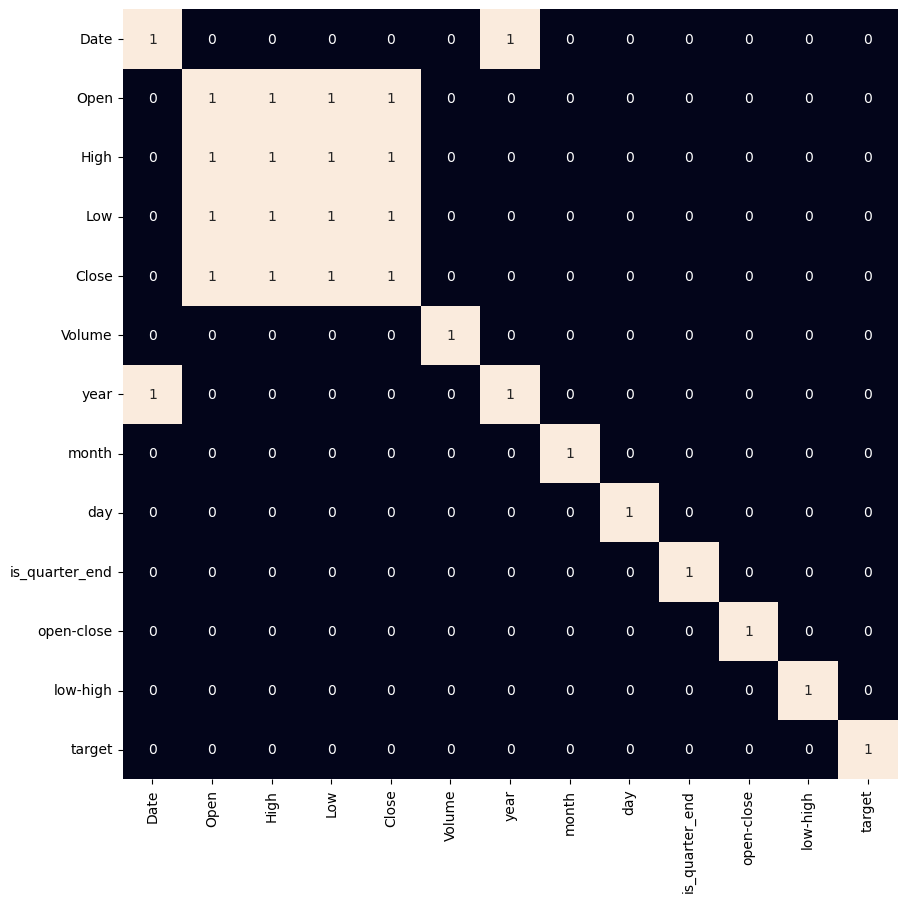

In [70]:
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [71]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid = features[:len(features)//7], features[len(features)//7:]
Y_train, Y_valid = target[:len(features)//7], target[len(features)//7:]

#### Model Development and Evaluation

In [72]:
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
    models[i].fit(X_train, Y_train)

    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
    print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:, 1]))
    print()

LogisticRegression() : 
Training Accuracy :  0.5327153904236206
Validation Accuracy :  0.5164852610682176

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.4698622646913323
Validation Accuracy :  0.48914916332038516

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) : 
Train

In [73]:
# ✅ Logistic Regression → Quick, interpretable baseline model.
# ✅ SVC (with poly kernel) → Good for complex decision boundaries but may overfit.
# ✅ XGBClassifier → Typically strong for structured data with robust performance.

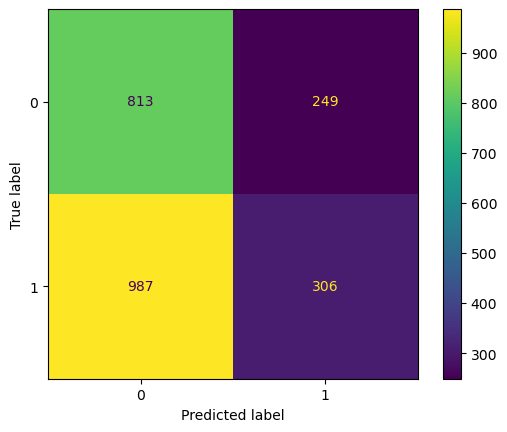

In [74]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_valid, Y_valid)
plt.show()

##### Conclusion:
We can observe that the accuracy achieved by the state-of-the-art ML model is no better than simply guessing with a probability of 50%. Possible reasons for this may be the lack of data or using a very simple model to perform such a complex task as Stock Market prediction.